In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.preprocessing import MaxAbsScaler, Normalizer, StandardScaler, RobustScaler


%matplotlib inline

In [25]:
df = pd.read_pickle('df_ready1')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2421 entries, 3 to 3194
Columns: 212 entries, State FIPS Code to % Rural denominator
dtypes: float64(205), object(7)
memory usage: 3.9+ MB


In [27]:
df.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,% Non-Hispanic white denominator,% not proficient in English raw value,% not proficient in English numerator,% not proficient in English denominator,% not proficient in English CI low,% not proficient in English CI high,% Females raw value,% Rural raw value,% Rural numerator,% Rural denominator
3,01,001,01001,AL,Autauga County,2019,1,8824.057123,815.0,156132.0,...,55504.0,0.008285,430.0,51898.0,0.004225,0.012346,0.513422,0.420022,22921.0,54571.0
4,01,003,01003,AL,Baldwin County,2019,1,7224.632160,2827.0,576496.0,...,212628.0,0.004545,872.0,191854.0,0.002821,0.006269,0.514528,0.422791,77060.0,182265.0
5,01,005,01005,AL,Barbour County,2019,1,9586.165037,451.0,72222.0,...,25270.0,0.011993,297.0,24765.0,0.005805,0.018180,0.472299,0.677896,18613.0,27457.0
6,01,007,01007,AL,Bibb County,2019,1,11783.543675,445.0,63653.0,...,22668.0,0.003943,84.0,21301.0,0.000000,0.009334,0.464531,0.683526,15663.0,22915.0
7,01,009,01009,AL,Blount County,2019,1,10908.101822,1050.0,161107.0,...,58013.0,0.018700,1013.0,54171.0,0.013642,0.023758,0.506886,0.899515,51562.0,57322.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2421 entries, 3 to 3194
Columns: 212 entries, State FIPS Code to % Rural denominator
dtypes: float64(205), object(7)
memory usage: 3.9+ MB


In [30]:
df['target'] = 0

In [31]:
df[df['High school graduation raw value'] > 0.95]['target'].value_counts()

0    324
Name: target, dtype: int64

In [32]:
df[(df['High school graduation raw value'] > 0.85) & 
   (df['High school graduation raw value'] <= 0.95)]['target'].value_counts()

0    1452
Name: target, dtype: int64

In [33]:
df[(df['High school graduation raw value'] > 0.40) & 
   (df['High school graduation raw value'] <= 0.85)]['target'].value_counts()

0    643
Name: target, dtype: int64

In [34]:
df[df['High school graduation raw value'] <= 0.4]['target'].value_counts()

0    2
Name: target, dtype: int64

(array([  3.,   1.,   5.,   6.,  17.,  76., 184., 638., 970., 521.]),
 array([0.3630137 , 0.42671233, 0.49041096, 0.55410959, 0.61780822,
        0.68150685, 0.74520548, 0.80890411, 0.87260274, 0.93630137,
        1.        ]),
 <a list of 10 Patch objects>)

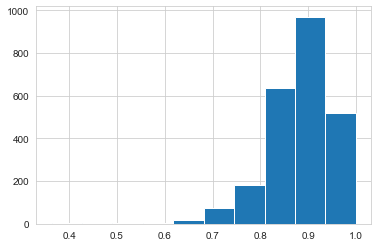

In [35]:
# Looking at the target variable distribution
plt.hist(df['High school graduation raw value'])

In [36]:
# Setting mock federal standard for a highschool grad rate of at least 90%
df.loc[df['High school graduation raw value'] >= 0.9, 'target'] = 1

df.loc[df['High school graduation raw value'] <0.9, 'target'] = 0



In [37]:
df['target'].value_counts().sort_index()

0    1316
1    1105
Name: target, dtype: int64

In [38]:
X = df.iloc[:, 6:]

In [39]:
X.drop(columns=['High school graduation raw value', 'target'], inplace=True)
y = df['target']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [41]:
standard = StandardScaler()
X_train_scaled = standard.fit_transform(X_train)
X_test_scaled = standard.fit_transform(X_test)

In [47]:
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_train)
X_pca_train.shape

(1815, 2)

In [51]:
principalDf = pd.DataFrame(data = X_pca_train
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-575476.072491,26027.579447
1,-298282.621409,-8757.684489
2,-458015.999679,30109.231550
3,72571.364280,-15847.294970
4,-579976.229740,19976.207928


In [58]:
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf['target'].value_counts()

0.0    1316
1.0    1105
Name: target, dtype: int64

In [62]:
finalDf.scatter(x='principal component 1', y='principal component 2', color='target')

AttributeError: 'DataFrame' object has no attribute 'scatter'

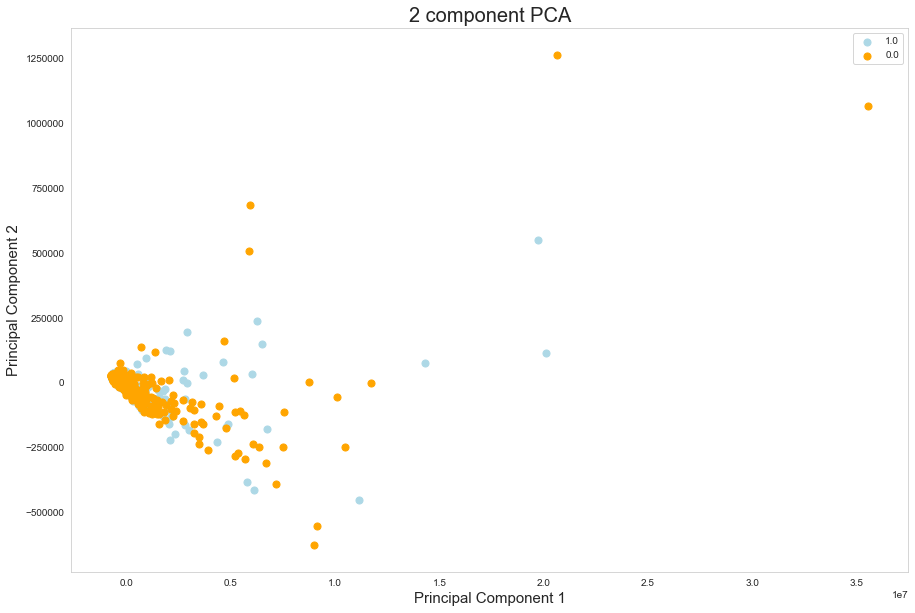

In [60]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1.0, 0.0]
colors = ['lightblue', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

(array([0.9965 , 0.99675, 0.997  , 0.99725, 0.9975 , 0.99775, 0.998  ,
        0.99825, 0.9985 ]), <a list of 9 Text yticklabel objects>)

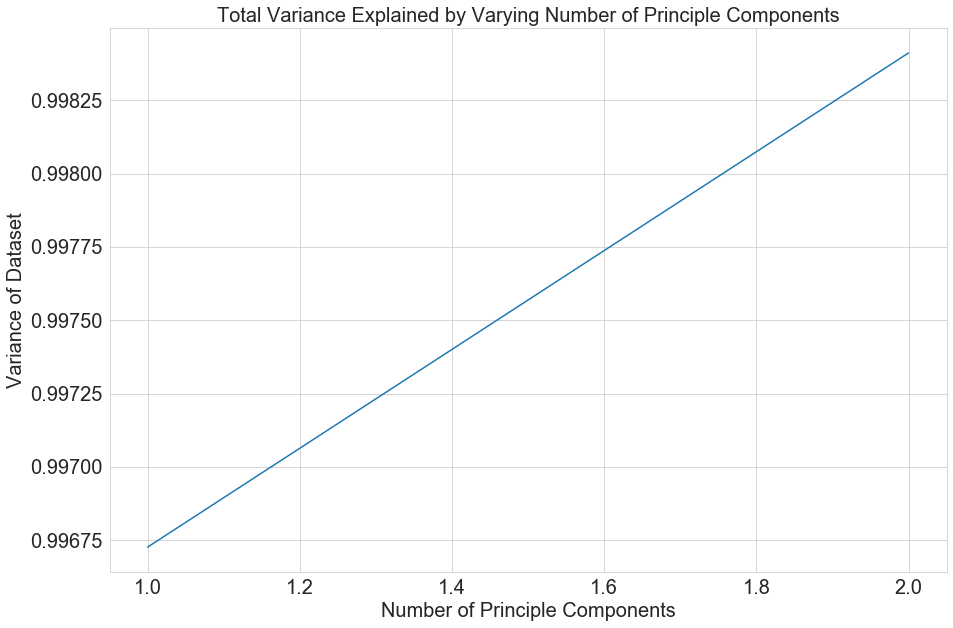

In [48]:
plt.figure(figsize=(15,10))
plt.plot(range(1,3), pca.explained_variance_ratio_.cumsum())
plt.title('Total Variance Explained by Varying Number of Principle Components', fontsize=20);
plt.xlabel('Number of Principle Components', fontsize=20)
plt.ylabel('Variance of Dataset', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

### COME BACK TO PCA LATER

# Random Forest



In [21]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
accuracy_score(y_test, y_pred)

0.7178217821782178

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])